<a href="https://colab.research.google.com/github/Jaiharish-passion07/Capstone_MachineLearning_Regression/blob/master/Machine_larning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mounting drive to load data 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Motivated Capstone project/ml reg data/SeoulBikeData.csv',encoding= 'unicode_escape')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
#Convert the Date column in Datetime Dtype
df['Date']=pd.to_datetime(df['Date'])

#Breaking Down the Date into 3 Components
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df.drop(['Date'],axis=1,inplace=True)
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


In [8]:
df['Year'].unique()

array([2017, 2018])

In [9]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

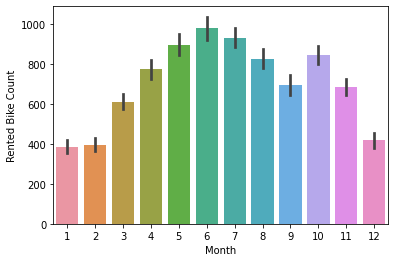

In [10]:
sns.barplot(df['Month'],df['Rented Bike Count'])

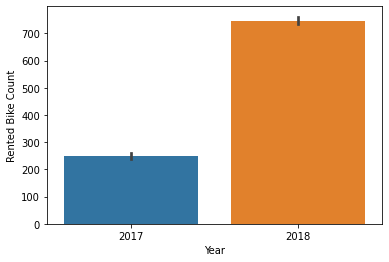

In [11]:
sns.barplot(df['Year'],df['Rented Bike Count'])

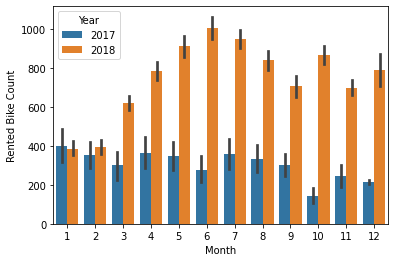

In [12]:
sns.barplot(df['Month'],df['Rented Bike Count'],hue=df['Year'])

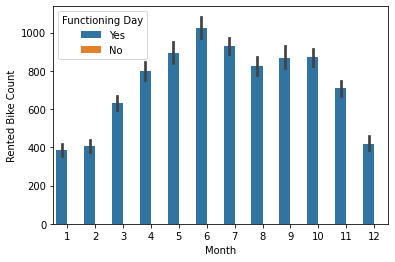

In [13]:
 sns.barplot(x=df['Month'],y=df['Rented Bike Count'],hue=df['Functioning Day']);

In [14]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day', 'Month', 'Year'],
      dtype='object')

#### Month and Year has a impact in the Target Variable,So we Droping the Day column

In [15]:
df.drop(['Day'],axis=1,inplace=True)


In [16]:
numeric_features = df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month',
       'Year'],
      dtype='object')

Linearity between Independent and Dependent Variables

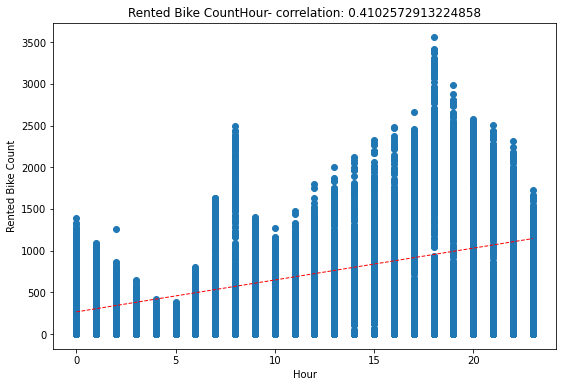

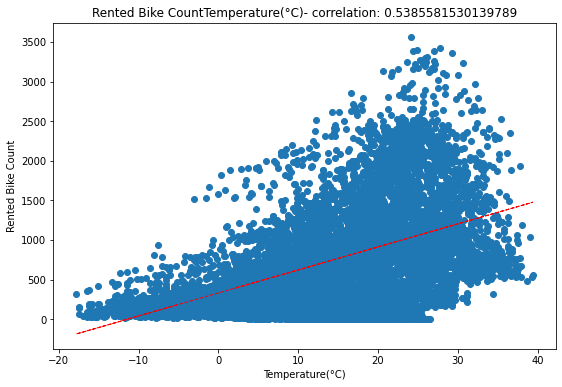

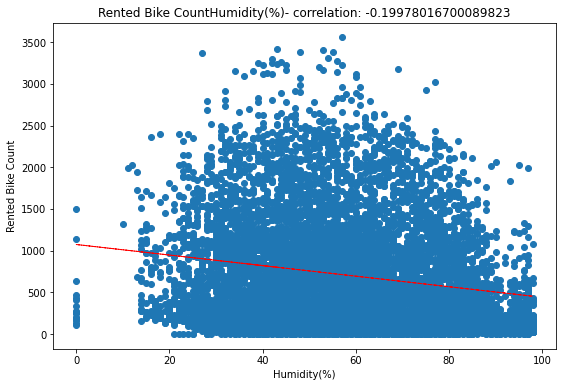

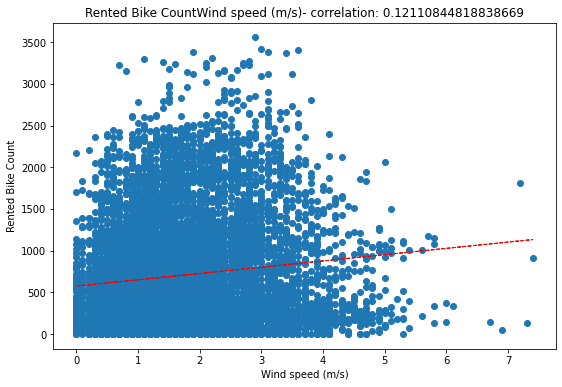

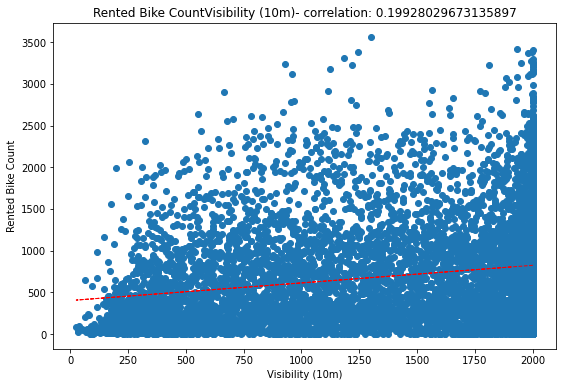

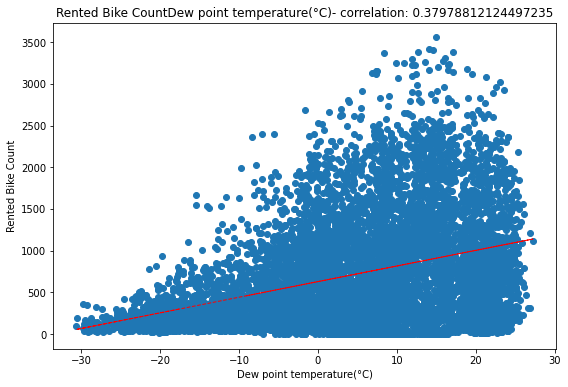

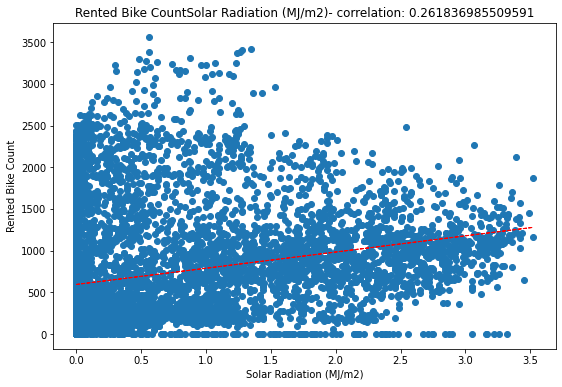

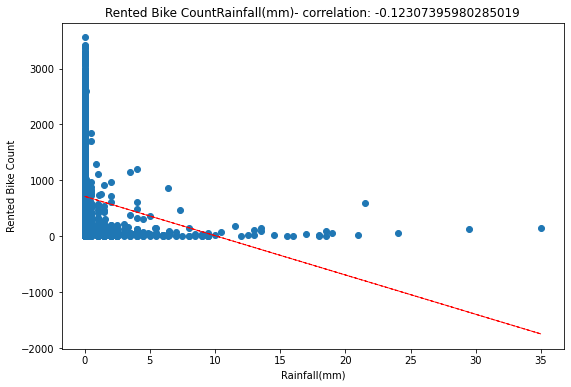

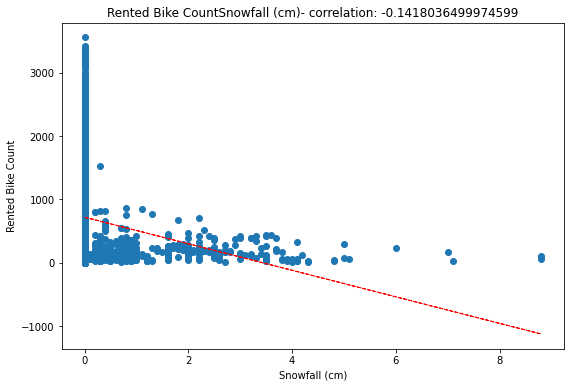

In [17]:
for col in numeric_features[1:-2]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col],df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

🤪Right Skewed Data:<br>
1. Rented Bike count<br>
2. Wind speed (m/s)<br>
3. Solar Radiation (MJ/m2)<br>
4. Rainfall(mm)<br> 
5. Snowfall (cm)

🤪Left Skewed Data:
1. Visibility (10m)

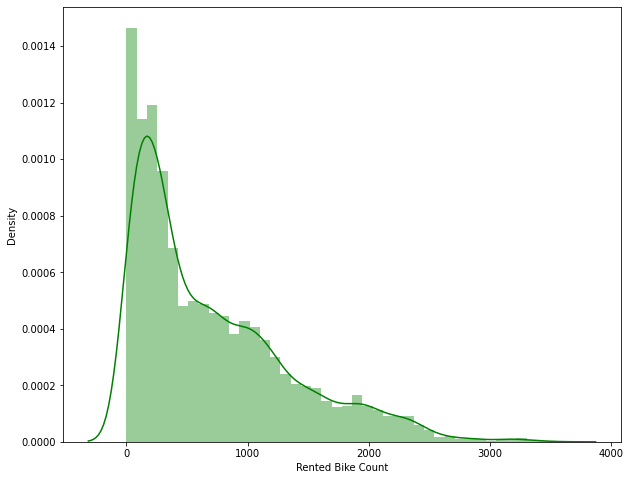

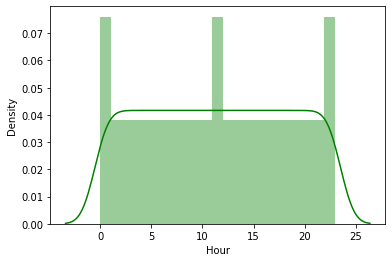

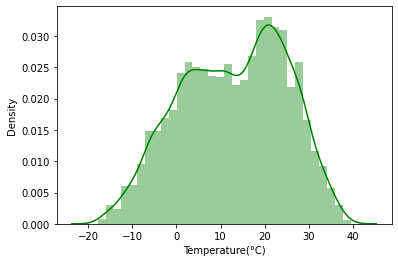

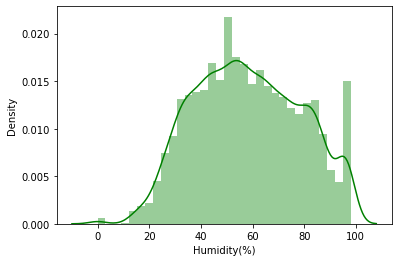

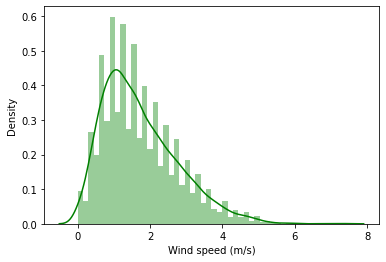

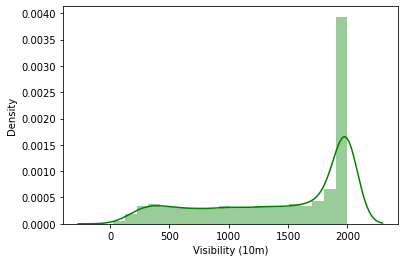

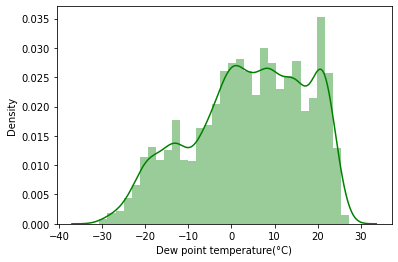

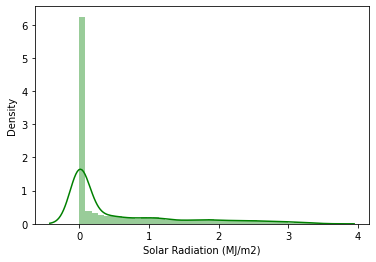

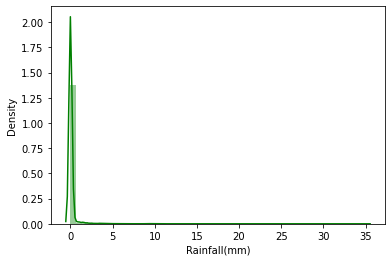

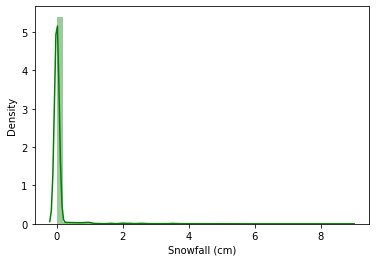

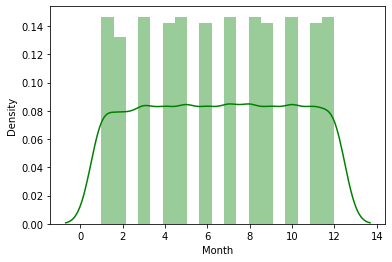

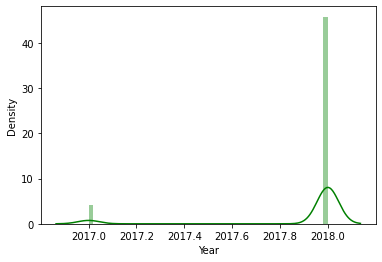

In [18]:
plt.figure(figsize=(10,8))
for col in numeric_features:
  sns.distplot(df[col],color='g')
  plt.show()

In [19]:
right_ske_numeric=['Rented Bike Count','Wind speed (m/s)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
left_skew_feat=['Dew point temperature(°C)','Visibility (10m)']

when removing outlier using IQR technique most of the values goes off and only 0 is left behind for Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)

log of 0's and -ve value is not possible

In [20]:
df = df[df['Wind speed (m/s)']<=4.5]
df=df[df['Solar Radiation (MJ/m2)']<=3]
df=df[df['Rainfall(mm)']<=10]
df=df[df['Snowfall (cm)']<=4]

In [21]:
df.shape

(8459, 15)

can't perform exponential transform for left skew data because once perormed it goes to infinity

In [22]:
import scipy.stats as stat
import pylab

In [23]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.distplot(df[feature],color="r")
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

For Right Skewed Data

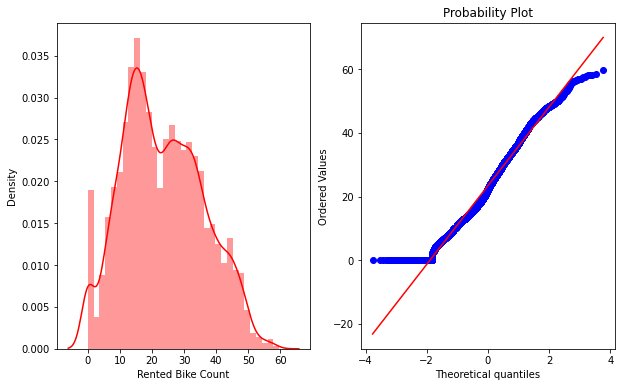

<Figure size 504x504 with 0 Axes>

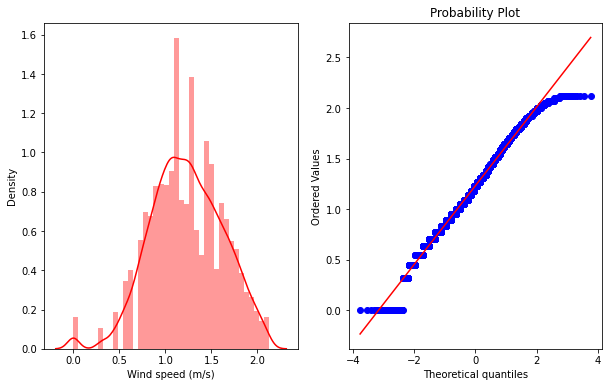

<Figure size 504x504 with 0 Axes>

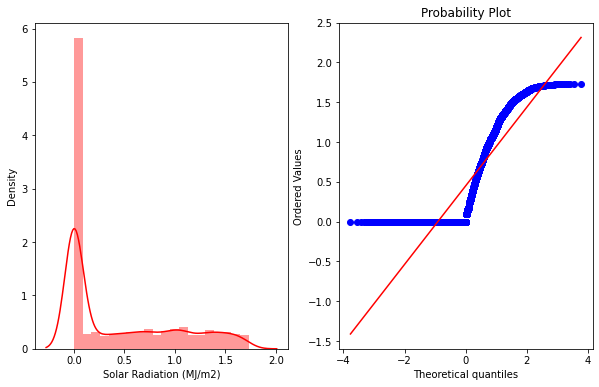

<Figure size 504x504 with 0 Axes>

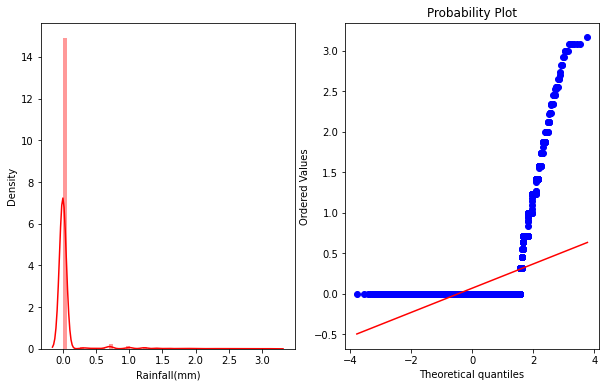

<Figure size 504x504 with 0 Axes>

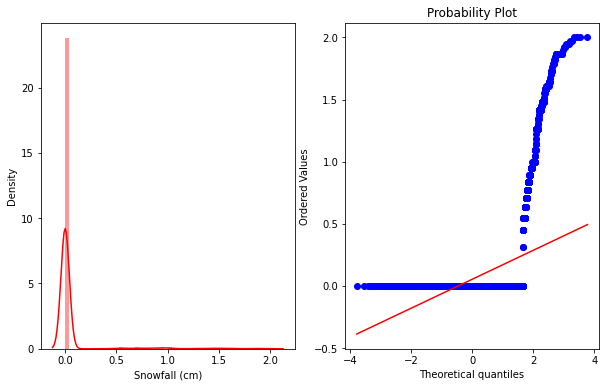

<Figure size 504x504 with 0 Axes>

In [24]:
df_clean=df.copy()
for col in right_ske_numeric:
  df_clean[col]=np.sqrt(df_clean[col])
  plot_data(df_clean,col)
  plt.figure(figsize=(7,7))

For Left Skewed Data

√(x_max-x_i )

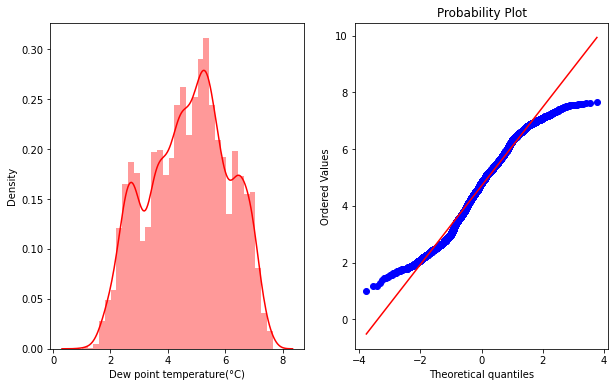

<Figure size 504x504 with 0 Axes>

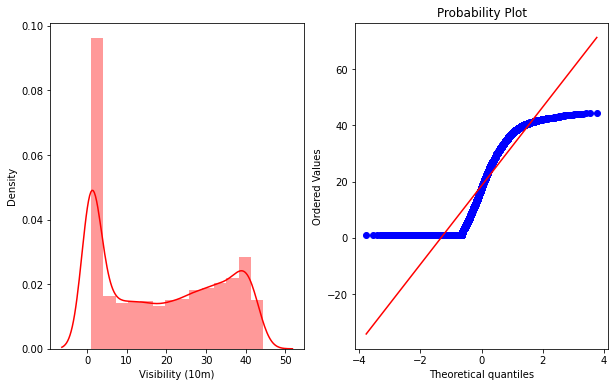

<Figure size 504x504 with 0 Axes>

In [25]:
for col in left_skew_feat:
  df_clean[col]=np.sqrt(max(df_clean[col]+1)-df_clean[col])
  plot_data(df_clean,col)
  plt.figure(figsize=(7,7))

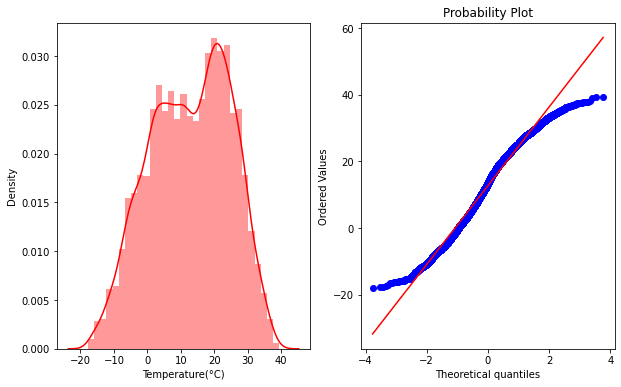

<Figure size 504x504 with 0 Axes>

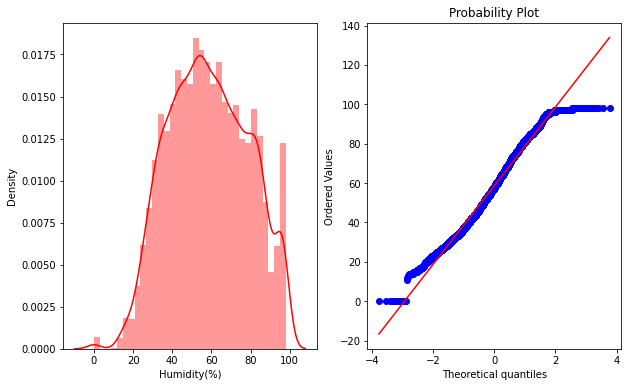

<Figure size 504x504 with 0 Axes>

In [26]:
fea=['Temperature(°C)', 'Humidity(%)']
for col in fea:
  plot_data(df_clean,col)
  plt.figure(figsize=(7,7))

Temperature and Humidity they are already in Normal Form

In [27]:
df_clean.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year
0,15.937377,0,-5.2,37,1.483240,1.0,6.767570,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
1,14.282857,1,-5.5,38,0.894427,1.0,6.767570,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
2,13.152946,2,-6.0,39,1.000000,1.0,6.774954,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
3,10.344080,3,-6.2,40,0.948683,1.0,6.767570,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
4,8.831761,4,-6.0,36,1.516575,1.0,6.841053,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017


In [28]:
np.sqrt(254)

15.937377450509228

In [29]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017


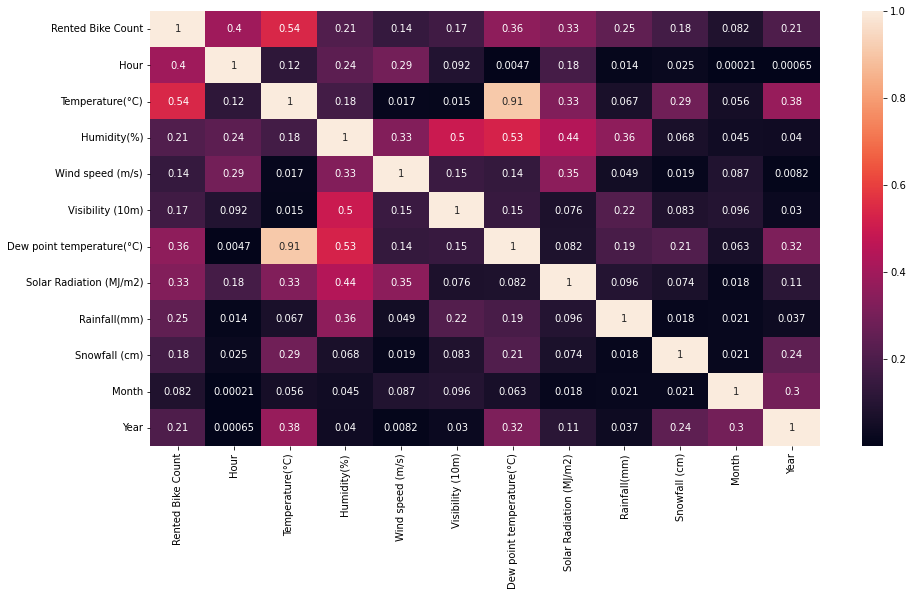

In [30]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df_clean.corr()
sns.heatmap(abs(correlation), annot=True)

Removal of Multicollinearity

In [31]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [32]:
calc_vif(df_clean[[i for i in df_clean.describe().columns if i not in ['Month', 'Year','Rented Bike Count','Dew point temperature(°C)','Visibility (10m)']]])

,variables,VIF
0,Hour,3.977697
1,Temperature(°C),3.215490
2,Humidity(%),6.796432
3,Wind speed (m/s),9.036191
4,Solar Radiation (MJ/m2),2.648707
5,Rainfall(mm),1.149202
6,Snowfall (cm),1.175055


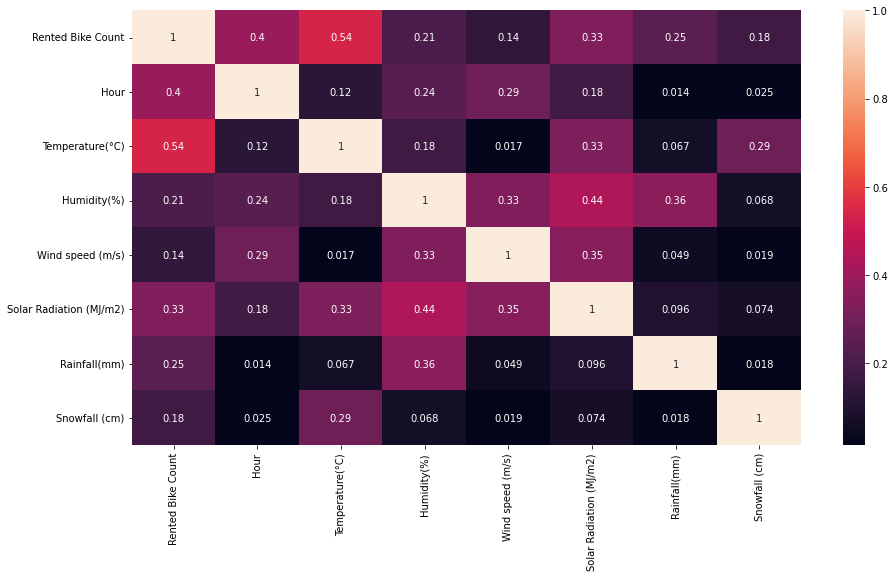

In [33]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df_clean[[i for i in df_clean.describe().columns if i not in ['Month', 'Year','Dew point temperature(°C)','Visibility (10m)']]].corr()
sns.heatmap(abs(correlation), annot=True)

In [34]:
final_numeric_features=[i for i in df_clean.describe().columns if i not in ['Dew point temperature(°C)','Visibility (10m)']]
categorical_features = df_clean.describe(include=['object','category']).columns
final_numeric_features.extend(categorical_features)

In [35]:
df_final_data=df_clean[final_numeric_features].copy()
df_final_data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Year,Seasons,Holiday,Functioning Day
0,15.937377,0,-5.2,37,1.483240,0.0,0.0,0.0,1,2017,Winter,No Holiday,Yes
1,14.282857,1,-5.5,38,0.894427,0.0,0.0,0.0,1,2017,Winter,No Holiday,Yes
2,13.152946,2,-6.0,39,1.000000,0.0,0.0,0.0,1,2017,Winter,No Holiday,Yes
3,10.344080,3,-6.2,40,0.948683,0.0,0.0,0.0,1,2017,Winter,No Holiday,Yes
4,8.831761,4,-6.0,36,1.516575,0.0,0.0,0.0,1,2017,Winter,No Holiday,Yes


In [36]:
df_final_data['Seasons'].value_counts()

Autumn    2150
Summer    2112
Winter    2107
Spring    2090
Name: Seasons, dtype: int64

In [37]:
df_final_data['Holiday'].value_counts()

No Holiday    8039
Holiday        420
Name: Holiday, dtype: int64

In [38]:
df_final_data['Functioning Day'].value_counts()

Yes    8175
No      284
Name: Functioning Day, dtype: int64

In [39]:
#Mapping the Variables
df_final_data['Functioning Day']=df_final_data['Functioning Day'].map({'Yes':1,'No':0})
df_final_data['Holiday']=df_final_data['Holiday'].map({'No Holiday':0,'Holiday':1})

In [40]:
season=pd.get_dummies(df_final_data['Seasons'],drop_first=True)
df_final_data.drop('Seasons',axis=1,inplace=True)

In [41]:
df_final_data=pd.concat([df_final_data,season],axis='columns')
df_final_data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Year,Holiday,Functioning Day,Spring,Summer,Winter
0,15.937377,0,-5.2,37,1.483240,0.0,0.0,0.0,1,2017,0,1,0,0,1
1,14.282857,1,-5.5,38,0.894427,0.0,0.0,0.0,1,2017,0,1,0,0,1
2,13.152946,2,-6.0,39,1.000000,0.0,0.0,0.0,1,2017,0,1,0,0,1
3,10.344080,3,-6.2,40,0.948683,0.0,0.0,0.0,1,2017,0,1,0,0,1
4,8.831761,4,-6.0,36,1.516575,0.0,0.0,0.0,1,2017,0,1,0,0,1


In [42]:
x=df_final_data.drop('Rented Bike Count',axis=1)
y=np.log10(df_final_data['Rented Bike Count']+1)


In [43]:
x.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Year,Holiday,Functioning Day,Spring,Summer,Winter
0,0,-5.2,37,1.483240,0.0,0.0,0.0,1,2017,0,1,0,0,1
1,1,-5.5,38,0.894427,0.0,0.0,0.0,1,2017,0,1,0,0,1
2,2,-6.0,39,1.000000,0.0,0.0,0.0,1,2017,0,1,0,0,1
3,3,-6.2,40,0.948683,0.0,0.0,0.0,1,2017,0,1,0,0,1
4,4,-6.0,36,1.516575,0.0,0.0,0.0,1,2017,0,1,0,0,1


In [44]:
y.head()

0    1.228846
1    1.184205
2    1.150847
3    1.054769
4    0.992631
Name: Rented Bike Count, dtype: float64

zscore

In [45]:
from scipy.stats import zscore
#Train test split
X =x.apply(zscore)

In [46]:
X

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Year,Holiday,Functioning Day,Spring,Summer,Winter
0,-1.632233,-1.506616,-1.075023,0.644441,-0.806458,-0.213386,-0.210268,-1.596922,-3.27354,-0.228572,0.186387,-0.572846,-0.57685,1.736293
1,-1.489477,-1.531832,-1.025348,-0.864562,-0.806458,-0.213386,-0.210268,-1.596922,-3.27354,-0.228572,0.186387,-0.572846,-0.57685,1.736293
2,-1.346721,-1.573860,-0.975672,-0.594001,-0.806458,-0.213386,-0.210268,-1.596922,-3.27354,-0.228572,0.186387,-0.572846,-0.57685,1.736293
3,-1.203965,-1.590671,-0.925996,-0.725515,-0.806458,-0.213386,-0.210268,-1.596922,-3.27354,-0.228572,0.186387,-0.572846,-0.57685,1.736293
4,-1.061210,-1.573860,-1.124699,0.729872,-0.806458,-0.213386,-0.210268,-1.596922,-3.27354,-0.228572,0.186387,-0.572846,-0.57685,1.736293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1.080128,-0.716491,-1.224051,0.975584,-0.806458,-0.213386,-0.210268,1.290838,0.30548,-0.228572,0.186387,-0.572846,-0.57685,-0.575940
8756,1.222884,-0.783735,-1.075023,0.729872,-0.806458,-0.213386,-0.210268,1.290838,0.30548,-0.228572,0.186387,-0.572846,-0.57685,-0.575940
8757,1.365639,-0.850980,-0.975672,-1.753093,-0.806458,-0.213386,-0.210268,1.290838,0.30548,-0.228572,0.186387,-0.572846,-0.57685,-0.575940
8758,1.508395,-0.893008,-0.876320,-0.594001,-0.806458,-0.213386,-0.210268,1.290838,0.30548,-0.228572,0.186387,-0.572846,-0.57685,-0.575940


In [47]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(6767, 14)
(1692, 14)


In [48]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [49]:
print("Train Accuracy:",reg.score(X_train, y_train))
print("Test Accuracy:",reg.score(X_test, y_test))

Train Accuracy: 0.8381698777334994
Test Accuracy: 0.8283551698613484


In [50]:
y_train_pred=reg.predict(X_train)
y_pred = reg.predict(X_test)

In [73]:
residuals = np.round((10**(y_train.values))**2)-np.round((10**(y_train_pred))**2)
mean_residuals = np.mean(residuals)
print("Mean of Residuals for Linear Regression Model:{}".format(mean_residuals))

Mean of Residuals for Linear Regression Model:98.40549726614452


In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


MSE  = mean_squared_error(np.round((10**(y_test))**2),np.round((10**(y_pred))**2))
print("MSE :" , MSE)

MAE=mean_absolute_error(np.round((10**(y_test))**2),np.round((10**(y_pred))**2))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 195790.79669030732
MAE : 286.7955082742317
RMSE : 442.482538288583


In [53]:
from sklearn.metrics import r2_score
r2 = r2_score(np.round((10**(y_test))**2),np.round((10**(y_pred))**2))
print("R2 :" ,r2)
#print("Adjusted R2 : ",1-(1-r2_score((10**(y_test))**2),np.round((10**(y_pred))**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.5658760086490975


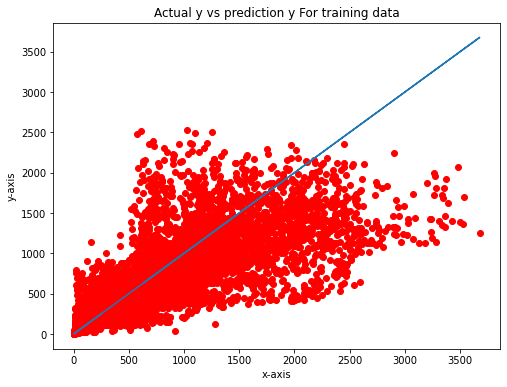

In [54]:
plt.figure(figsize=(8,6))
plt.plot(np.round((10**(y_train))**2),np.round((10**(y_train))**2))
plt.scatter(np.round((10**(y_train))**2),np.round((10**(y_train_pred))**2),color='r')
# Adding the title
plt.title("Actual y vs prediction y For training data")
# Adding the labels
plt.ylabel("y-axis")
plt.xlabel("x-axis")
plt.show()

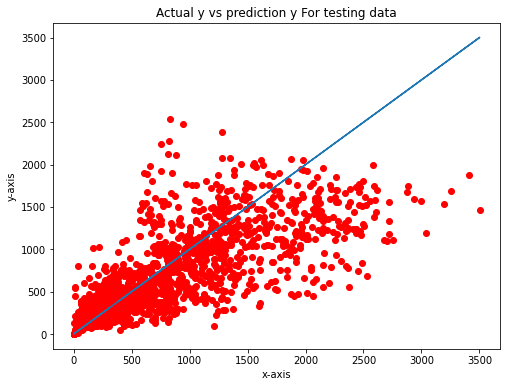

In [55]:
plt.figure(figsize=(8,6))
plt.plot(np.round((10**(y_test))**2),np.round((10**(y_test))**2))
plt.scatter(np.round((10**(y_test))**2),np.round((10**(y_pred))**2),color='r')
# Adding the title
plt.title("Actual y vs prediction y For testing data")
# Adding the labels
plt.ylabel("y-axis")
plt.xlabel("x-axis")
plt.show()

In [56]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

lasso  = Lasso(alpha=0.00005 , max_iter= 5000)
ridge  = Ridge(alpha=0.00005 , max_iter= 5000)

lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

Ridge(alpha=5e-05, max_iter=5000)

In [57]:
lasso.score(X_train, y_train)

0.8381690538443347

In [58]:
ridge.score(X_train, y_train)

0.8381698777334994

Hyperparameter Tuning

In [59]:
#Imports
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
#seed for random state and splits - number of Kfolds
random_seed = 1
splits = 5
#Scikit Kfold model call
kfold = model_selection.KFold(n_splits=splits,random_state=random_seed,shuffle=True)
#Linear Regression Model
model = LinearRegression()
#results set equal to model with kfolds
results = model_selection.cross_val_score(model, X_train,y_train,cv=kfold)
#printing the averaged score over the 5 Kfolds
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 83.618% (1.469%)


In [60]:
ridg=Ridge(alpha=1e-05, fit_intercept=True, normalize=False, solver='lsqr')


In [61]:
ridg.fit(X_train,y_train)

Ridge(alpha=1e-05, normalize=False, solver='lsqr')

In [62]:
ridg.score(X_train,y_train)

0.8381645956002467

According to Linear Regression Assumption.The following cases are not satisfied
1. There is no Linearity between Predictors vs Target
1. The Most of the features are not normally distributed.
2. There Some Noisy data in features.
3. Mean of residuals are not close to zero



Random Forest Algorithm

In [63]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
random_reg = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
random_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [64]:
print("Train Accuracy:",random_reg.score(X_train, y_train))
print("Test Accuracy:",random_reg.score(X_test, y_test))

Train Accuracy: 0.9916149606377758
Test Accuracy: 0.9302963277964656


In [65]:
y_train_pred_random=random_reg.predict(X_train)
y_pred_random = random_reg.predict(X_test)

In [74]:
residuals_random = np.round((10**(y_train.values))**2)-np.round((10**(y_train_pred_random))**2)
mean_residuals_random = np.mean(residuals_random)
print("Mean of Residuals for Random Forest Model:{}".format(mean_residuals_random))

Mean of Residuals for Random Forest Model:19.27648884291414


In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


MSE  = mean_squared_error(np.round((10**(y_test))**2),np.round((10**(y_pred_random))**2))
print("MSE :" , MSE)

MAE=mean_absolute_error(np.round((10**(y_test))**2),np.round((10**(y_pred_random))**2))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 60420.24349881797
MAE : 143.77777777777777
RMSE : 245.8052959128789


In [67]:
from sklearn.metrics import r2_score
r2 = r2_score(np.round((10**(y_test))**2),np.round((10**(y_pred_random))**2))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(np.round((10**(y_test))**2),np.round((10**(y_pred_random))**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.8660311020257532
Adjusted R2 :  0.8649126973915019


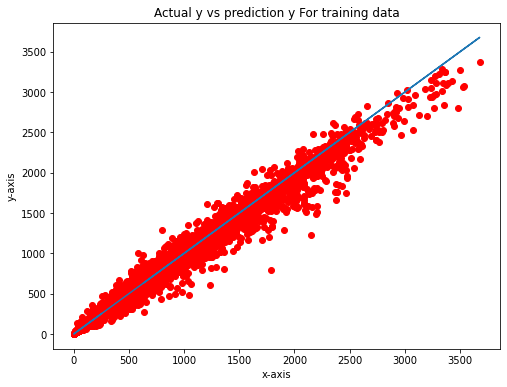

In [68]:
plt.figure(figsize=(8,6))
plt.plot(np.round((10**(y_train))**2),np.round((10**(y_train))**2))
plt.scatter(np.round((10**(y_train))**2),np.round((10**(y_train_pred_random))**2),color='r')
# Adding the title
plt.title("Actual y vs prediction y For training data")
# Adding the labels
plt.ylabel("y-axis")
plt.xlabel("x-axis")
plt.show()

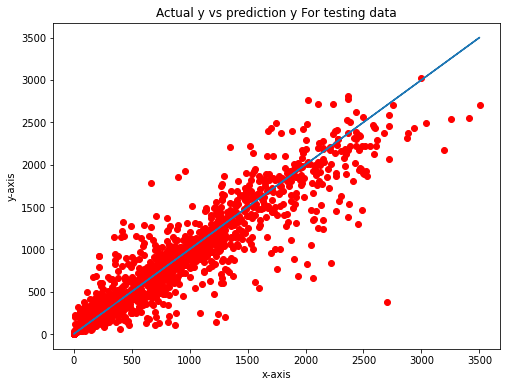

In [69]:
plt.figure(figsize=(8,6))
plt.plot(np.round((10**(y_test))**2),np.round((10**(y_test))**2))
plt.scatter(np.round((10**(y_test))**2),np.round((10**(y_pred_random))**2),color='r')
# Adding the title
plt.title("Actual y vs prediction y For testing data")
# Adding the labels
plt.ylabel("y-axis")
plt.xlabel("x-axis")
plt.show()